<a href="https://colab.research.google.com/github/rod-duarte/siminiproject/blob/main/MLP_MiniProjeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Projeto MLP para Detecção de Lombalgia**

### Disciplina: IF684EC - Sistemas Inteligentes
### Professor: Germano Crispim Vasconcelos
### Grupo:
*   Rodrigo Duarte (rabd)
* Gabriela Souza (gmms)



Neste mini projeto, exploraremos o uso de Redes Neurais Multilayer Perceptron (MLP).<br>Utilizaremos um conjunto de dados específico relacionado à lombalgia para treinar e desenvolver uma rede neural capaz de identificar indivíduos que podem estar em risco ou já sofrendo dessa condição.


#1

Neste projeto, empregamos diversas bibliotecas importantes para a construção e treinamento de nossa rede neural.

*   Pandas: Manipulação de dados e organização do conjunto de dados relacionado à lombalgia.
*   NumPy: Para processamento numérico, recorremos à biblioteca NumPy, que nos permitiu realizar operações matemáticas essenciais.
* Seaborn: Facilita a criação de gráficos estatísticos, o que os torna mais simples de serem lidos.
* Sklearn: Foi utilizada para compreender o desempenho do modelo, por meio da matriz de confusão.
*   Matplotlib:A biblioteca Matplotlib foi utilizada para criar visualizações e gráficos que nos auxiliaram na análise dos resultados.
*   TensorFlow: Biblioteca de aprendizado de máquina amplamente reconhecida, para implementar nossa rede neural.
*   TensorFlow (parte 2): A arquitetura de nossa rede neural foi desenvolvida com o auxílio do TensorFlow.
Utilizamos as classes Sequential para a criação de camadas sequenciais e Dense para a definição das camadas densas.
*   Otimizador Adam: Para otimização do nosso modelo, aplicamos o otimizador Adam.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#2
Realizaremos a leitura do conjunto de dados e o armazenaremos em uma variável para que possamos começar a explorar e analisar os dados de maneira mais detalhada.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rod-duarte/siminiproject/main/Dataset_spine.csv')

# Conhecendo os dados

Apresentaremos uma amostra inicial do conjunto de dados, permitindo-nos ter uma visão preliminar dos dados que estamos prestes a analisar. Isso nos ajudará a entender melhor a estrutura e os tipos de informações que o conjunto de dados contém

In [3]:
df.shape

(310, 14)

In [4]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
df.dtypes

Col1           float64
Col2           float64
Col3           float64
Col4           float64
Col5           float64
Col6           float64
Col7           float64
Col8           float64
Col9           float64
Col10          float64
Col11          float64
Col12          float64
Class_att       object
Unnamed: 13     object
dtype: object

In [6]:
df.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [7]:
#Distribuição dos dados da variável resposta
distribution = df['Class_att'].value_counts()
print(distribution)

Abnormal    210
Normal      100
Name: Class_att, dtype: int64


<ipython-input-8-645bbaa43fd5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dataFrame.corr()


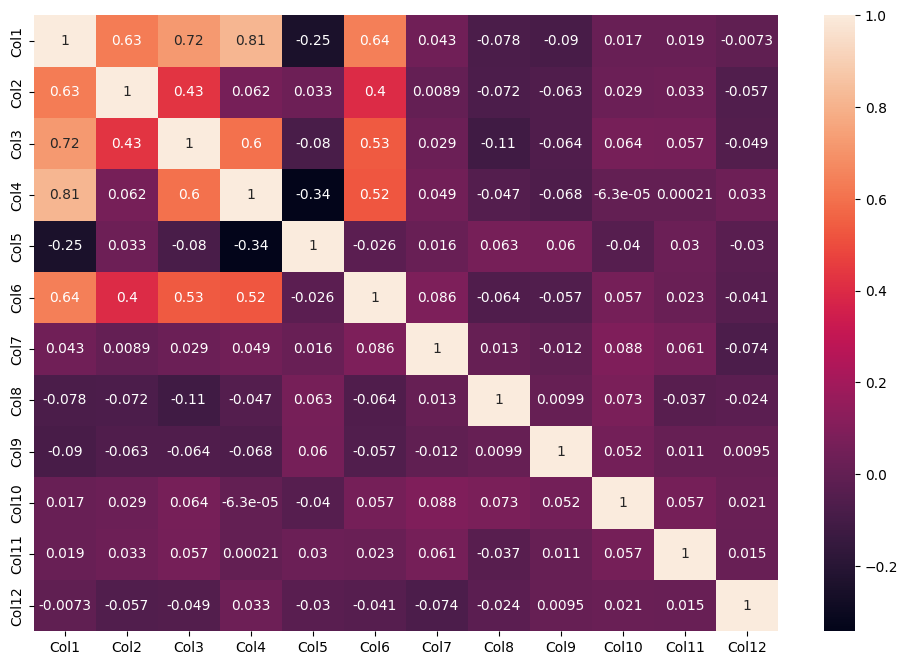

In [8]:
#Matriz de correlação
dataFrame = pd.DataFrame(df)
correlacao = dataFrame.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(correlacao, annot=True)
plt.show()

#3
Identificamos e removeremos um dado que se revelou irrelevante para a análise de nossa rede neural. A eliminação desse dado não apenas otimizará nosso conjunto de dados, mas também aprimorará a eficiência da análise subsequente, garantindo que estejamos focados apenas nas informações relevantes para o treinamento e avaliação de nossa rede neural.

In [9]:
df = df.drop(['Unnamed: 13'], axis='columns')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


#4
No próximo estágio, procederemos com a divisão de nossos dados em duas partes essenciais. A primeira parte, representando 80% do conjunto de dados, será destinada ao treinamento de nossa rede neural. A segunda parte, compreendendo 20% dos dados, será reservada para avaliar o desempenho da rede durante os testes.

In [78]:
seed = 13

In [79]:
df_shuffled = df.sample(frac=1,random_state=seed)

division = int(len(df) * 0.8)

df_train = df_shuffled.iloc[:division]
df_test = df_shuffled.iloc[division:]

#5
Uma vez que os conjuntos de dados estão divididos, o próximo passo envolve a separação de cada um deles em duas partes distintas: características (ou X) e classes (ou Y). Para realizar isso, estabelecemos que as classes (Y_train e Y_test) serão rotuladas como 1 para os dados que indicam a presença de lombalgia e 0 para aqueles que não indicam. Quanto às características de entrada, basta excluir a coluna que corresponde às classes. Dessa forma, obtemos os conjuntos de dados de entrada tanto para o treinamento quanto para os testes (X_train e X_test, respectivamente).

In [80]:
Y_train = 1 - pd.factorize(df_train['Class_att'])[0]
X_train = df_train.drop(['Class_att'], axis=1)

Y_test = 1 - pd.factorize(df_test['Class_att'])[0]
X_test = df_test.drop(['Class_att'], axis=1)

#6

Nesse trecho de código vamos montar a estrutura da nossa Rede que será usada com os dados que preparamos. Para isso, estruturamos com duas camadas ocultas que tem funcao de ativação como 'Relu' e na camada de saida a sigmoide

In [81]:
input_shape = (12,)

model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#7

Após definir a arquitetura da rede o modelo necessita de alguns parâmetros adicionais para ser treinado e finalmente avaliado. O otimizador Adam, com taxa de aprendizado de 0,0001, e a função de loss Binary Crossentropy foram aplicados para a implementação desejada.

In [82]:
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
result = model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

#Matriz de confusão

2/2 [==============================] - 0s 4ms/step


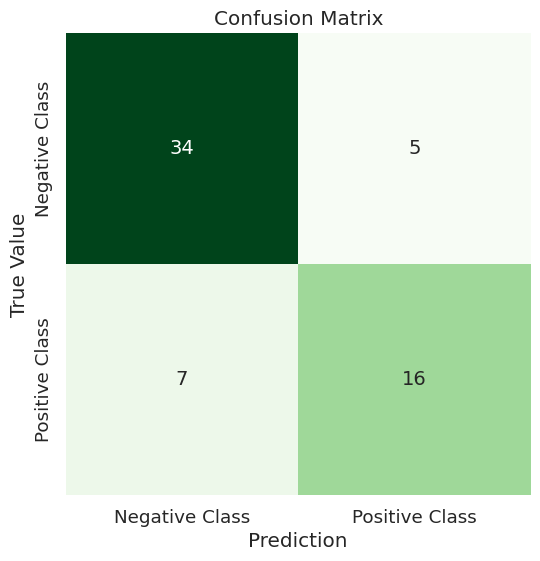

In [85]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype(int)
confusion = confusion_matrix(Y_test, binary_predictions)

class_labels = ['Negative Class', 'Positive Class']
plt.figure(figsize=(6, 6))
sn.set(font_scale=1.2)
sn.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={"size": 14}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

#8

Geramos alguns gráficos para melhor visualização da rede. E por fim, com o modelo treinado, conseguimos testar o mesmo utilizando os dados que separamos previamente.

Text(0.5, 1.0, 'Validation Accuracy')

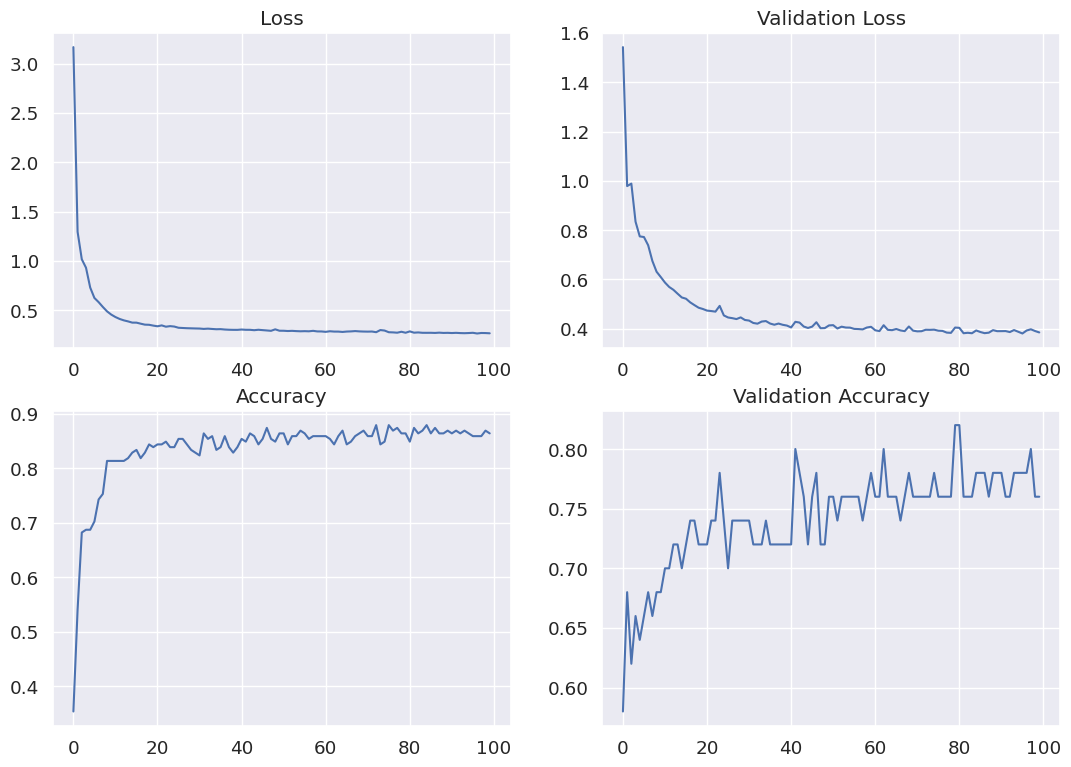

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(13, 9))
ax[0][0].plot(result.history['loss'])
ax[0][0].set_title('Loss')
ax[1][0].plot(result.history['accuracy'])
ax[1][0].set_title('Accuracy')
ax[0][1].plot(result.history['val_loss'])
ax[0][1].set_title('Validation Loss')
ax[1][1].plot(result.history['val_accuracy'])
ax[1][1].set_title('Validation Accuracy')

In [83]:
eval = model.evaluate(X_test, Y_test, verbose=0)
print(f'Loss: {eval[0]} - Accuracy: {eval[1]}')

Loss: 0.49146556854248047 - Accuracy: 0.8064516186714172


#9

Como experimentações trouxemos uma implementação de rede com mais camadas e mais uma implementação parecida com a rede que utilizamos previamente, porém usando uma funçao de loss diferente (MSE).

In [93]:
deep_model = Sequential()
deep_model.add(Dense(128, input_shape=input_shape, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))

deep_optimizer = Adam(learning_rate=1e-4)
deep_model.compile(loss='binary_crossentropy', optimizer=deep_optimizer, metrics=['accuracy'])
deep_result = deep_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

deep_eval = deep_model.evaluate(X_test, Y_test, verbose=0)
print(f'Loss: {deep_eval[0]} - Accuracy: {deep_eval[1]}')

Loss: 0.7513574957847595 - Accuracy: 0.774193525314331


Text(0.5, 1.0, 'Validation Accuracy')

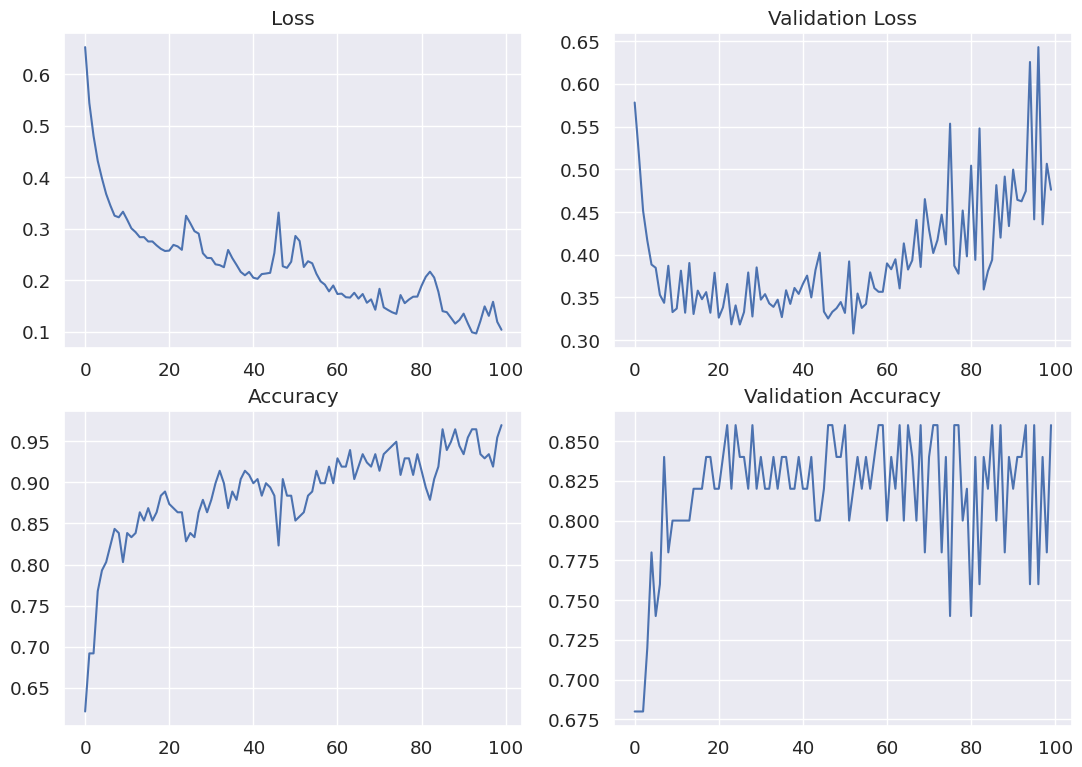

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(13, 9))
ax[0][0].plot(deep_result.history['loss'])
ax[0][0].set_title('Loss')
ax[1][0].plot(deep_result.history['accuracy'])
ax[1][0].set_title('Accuracy')
ax[0][1].plot(deep_result.history['val_loss'])
ax[0][1].set_title('Validation Loss')
ax[1][1].plot(deep_result.history['val_accuracy'])
ax[1][1].set_title('Validation Accuracy')

É possível notar que o overfitting está acontecendo, visto que o gráfico de loss decai enquanto o de validation loss cresce. Tambem é possivel notar que a acuracia nao muda tanto.

In [95]:
# Rede neural com a função de loss MSE
mse_model = Sequential()
mse_model.add(Dense(128, input_shape=input_shape, activation='relu'))
mse_model.add(Dense(64, activation='relu'))
mse_model.add(Dense(1, activation='sigmoid'))

mse_optimizer = Adam(learning_rate=1e-4)
mse_model.compile(loss='mean_squared_error', optimizer=mse_optimizer, metrics=['accuracy'])
mse_result = mse_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

mse_eval = mse_model.evaluate(X_test, Y_test, verbose=0)
print(f'Loss: {mse_eval[0]} - Accuracy: {mse_eval[1]}')

Loss: 0.14646780490875244 - Accuracy: 0.7903226017951965


Text(0.5, 1.0, 'Validation Accuracy')

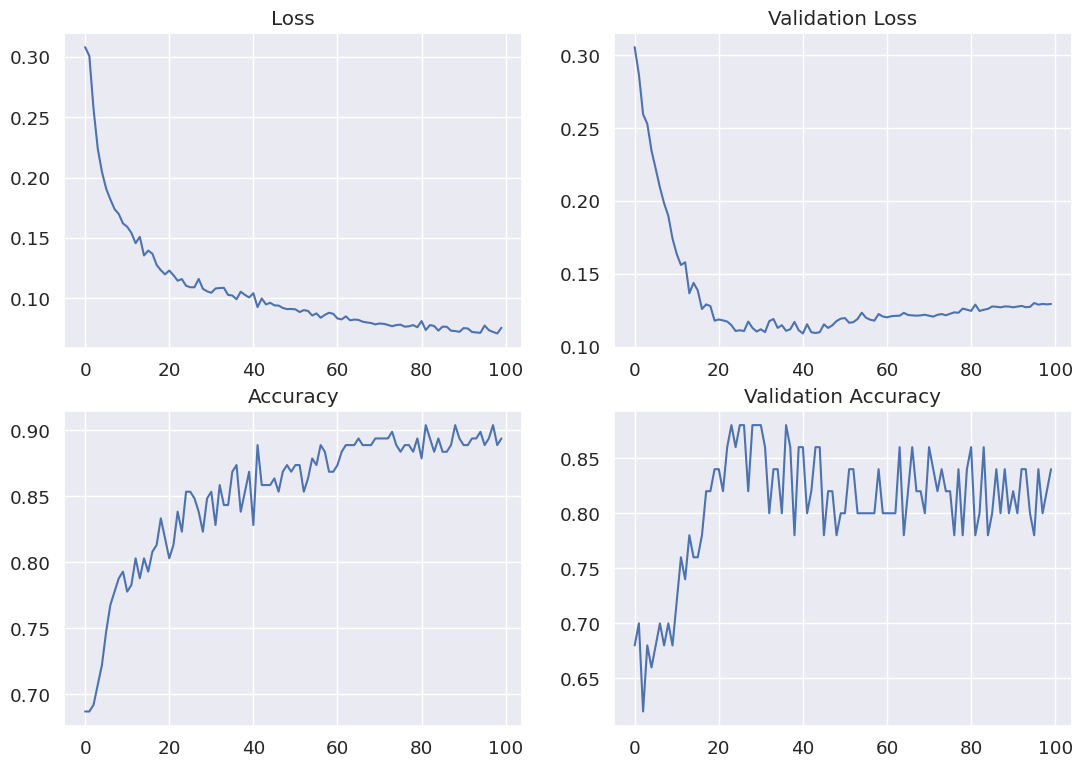

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(13, 9))
ax[0][0].plot(mse_result.history['loss'])
ax[0][0].set_title('Loss')
ax[1][0].plot(mse_result.history['accuracy'])
ax[1][0].set_title('Accuracy')
ax[0][1].plot(mse_result.history['val_loss'])
ax[0][1].set_title('Validation Loss')
ax[1][1].plot(mse_result.history['val_accuracy'])
ax[1][1].set_title('Validation Accuracy')